In [1]:
# Importações
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import os 
import joblib
import sys

# Caminho da pasta 'utils', uma pasta acima do notebook
utils_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'utils'))

# Adiciona ao sys.path se ainda não estiver
if utils_path not in sys.path:
    sys.path.append(utils_path)

# Importa o módulo
import funcoes_avaliacao as funcoes_avaliacao

In [2]:
def save_model(model, model_name):
    model_path = os.path.join("../", "models", f"{model_name}_base_line.pkl")
    joblib.dump(model, model_path)
    print(f"Modelo {model_name} salvo em {model_path}")

In [3]:
# Carregar e preparar dados
df_processed = pd.read_csv('C:/Users/Marcelo Almeida/Documents/TRABALHO DE CONCLUSÃO DE CURSO/projeto-tcc/data/processed/base_line/aneel_processed_model_baseline.csv', encoding='utf-8-sig')
df_processed = df_processed[['distribuidora_codificado','duracao_fila','duracao_atendimento','operacao_codificado','short_call_30s','skill_codificado','hora','flag_pesquisa','resposta_1','resposta_2','resposta_3','rechamou_30min','finalizacao_codificado']]

X = df_processed.drop(columns=['rechamou_30min'])
y = df_processed['rechamou_30min']


In [4]:
#Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#X_res, y_res = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X, y)
#X_res, y_res = SMOTE(sampling_strategy=1.0, random_state=42).fit_resample(X_train, y_train)

In [6]:
X_res, y_res = X_train, y_train

In [ ]:
"""#Treinar modelos
modelos = {
    'XGBoost': XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric='logloss', random_state=42,scale_pos_weight=3.0),
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42,scale_pos_weight=3.0),
    'CatBoost': CatBoostClassifier(verbose=0, random_seed=42,thread_count=-1),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
}
"""

In [7]:
#Treinar modelos
modelos = {
    'XGBoost': XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric='logloss', random_state=42,scale_pos_weight=3.0), #, scale_pos_weight=3.0
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42,scale_pos_weight=3.0), #, is_unbalance=True
    'CatBoost': CatBoostClassifier(verbose=0, random_seed=42,thread_count=-1, class_weights=[1, 3.0]),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, class_weight={0:1, 1:3.0})
    
}

Treinando XGBoost:2025-10-02 08:07:53


c:\Users\Marcelo Almeida\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:07:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo XGBoost salvo em ../models\XGBoost_base_line.pkl
Tempo de treinamento do modelo XGBoost: 0:00:25.230061
Resultados do modelo XGBoost:

🔍 XGBoost
Accuracy: 0.8749
Precision: 0.6774
Recall: 0.6813
F1 Score: 0.6794
AUC: 0.8809

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92    822693
           1       0.68      0.68      0.68    198649

    accuracy                           0.87   1021342
   macro avg       0.80      0.80      0.80   1021342
weighted avg       0.88      0.87      0.88   1021342



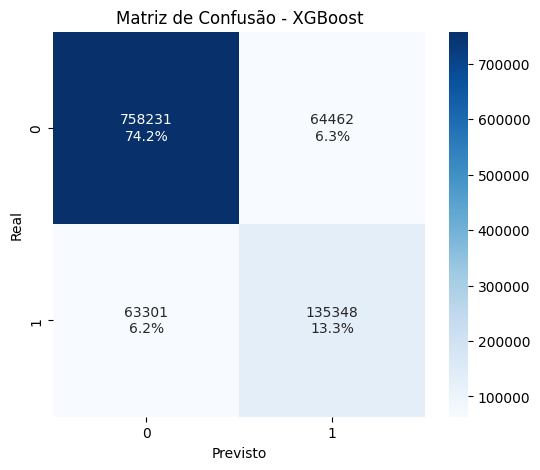

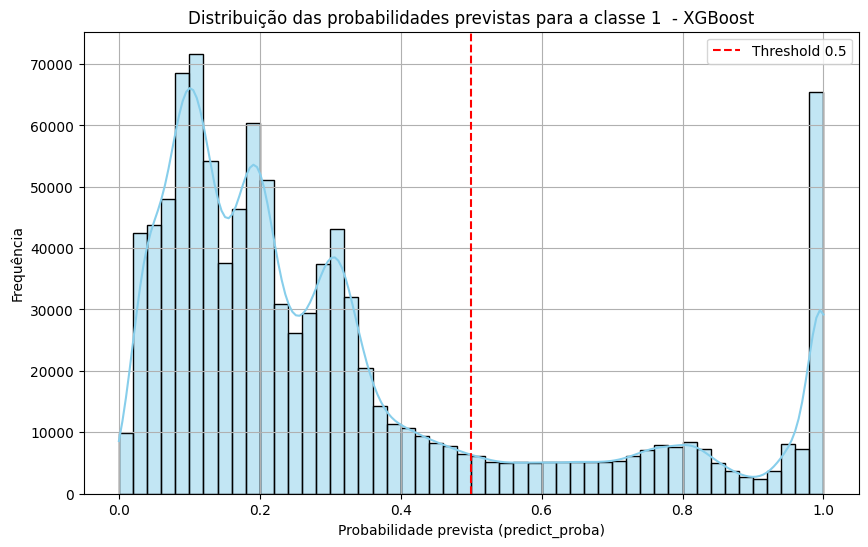

----------------------------------------------------------------------------
Treinando LightGBM:2025-10-02 08:08:24
[LightGBM] [Info] Number of positive: 795403, number of negative: 3289962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 4085365, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194696 -> initscore=-1.419782
[LightGBM] [Info] Start training from score -1.419782
Modelo LightGBM salvo em ../models\LightGBM_base_line.pkl
Tempo de treinamento do modelo LightGBM: 0:00:21.994061
Resultados do modelo LightGBM:

🔍 LightGBM
Accuracy: 0.8742
Precision: 0.6748
Recall: 0.6811
F1 Score: 0.6780
AUC: 0.8803

Classification Report:
               precision    recall  f1-score   support

      

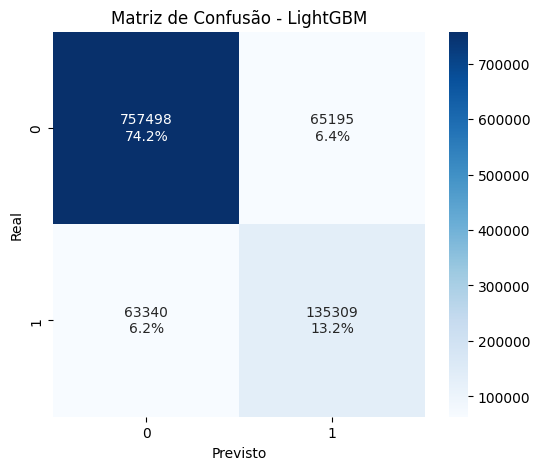

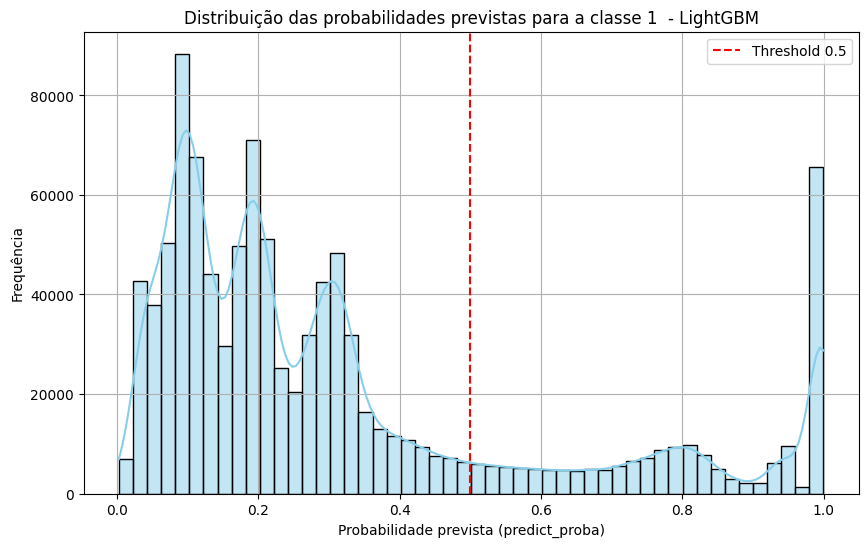

----------------------------------------------------------------------------
Treinando CatBoost:2025-10-02 08:08:52
Modelo CatBoost salvo em ../models\CatBoost_base_line.pkl
Tempo de treinamento do modelo CatBoost: 0:33:25.090023
Resultados do modelo CatBoost:

🔍 CatBoost
Accuracy: 0.8745
Precision: 0.6758
Recall: 0.6822
F1 Score: 0.6790
AUC: 0.8808

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92    822693
           1       0.68      0.68      0.68    198649

    accuracy                           0.87   1021342
   macro avg       0.80      0.80      0.80   1021342
weighted avg       0.87      0.87      0.87   1021342



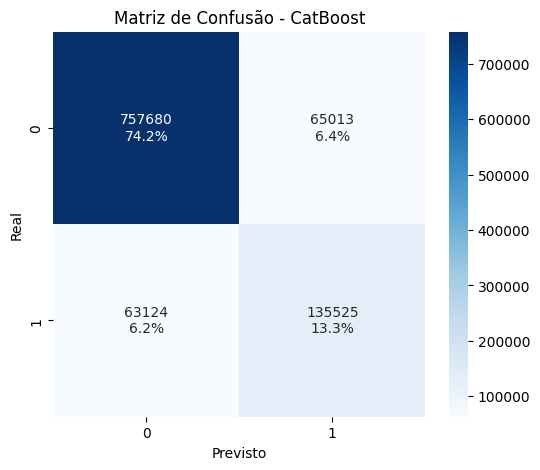

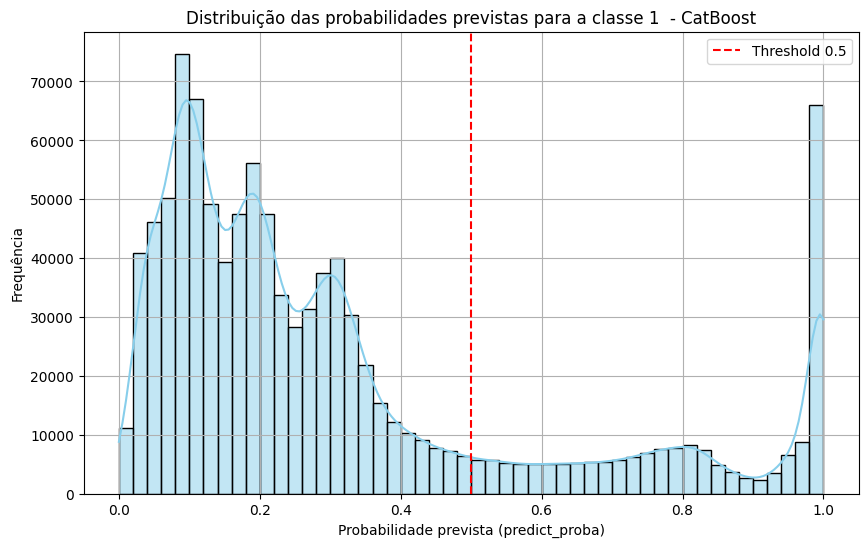

----------------------------------------------------------------------------
Treinando Random Forest:2025-10-02 08:42:23
Modelo Random Forest salvo em ../models\Random Forest_base_line.pkl
Tempo de treinamento do modelo Random Forest: 0:06:04.209189
Resultados do modelo Random Forest:

🔍 Random Forest
Accuracy: 0.8613
Precision: 0.6650
Recall: 0.5778
F1 Score: 0.6183
AUC: 0.8362

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92    822693
           1       0.67      0.58      0.62    198649

    accuracy                           0.86   1021342
   macro avg       0.78      0.75      0.77   1021342
weighted avg       0.86      0.86      0.86   1021342



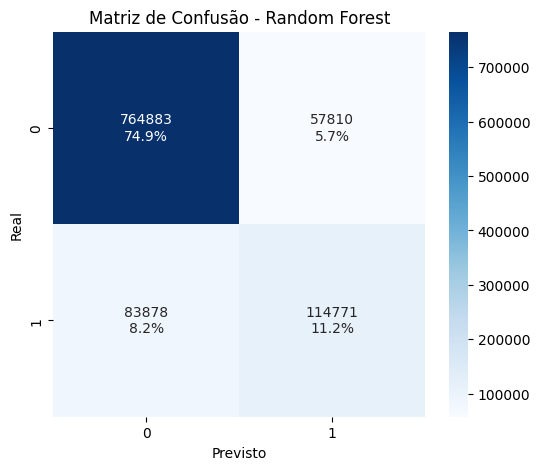

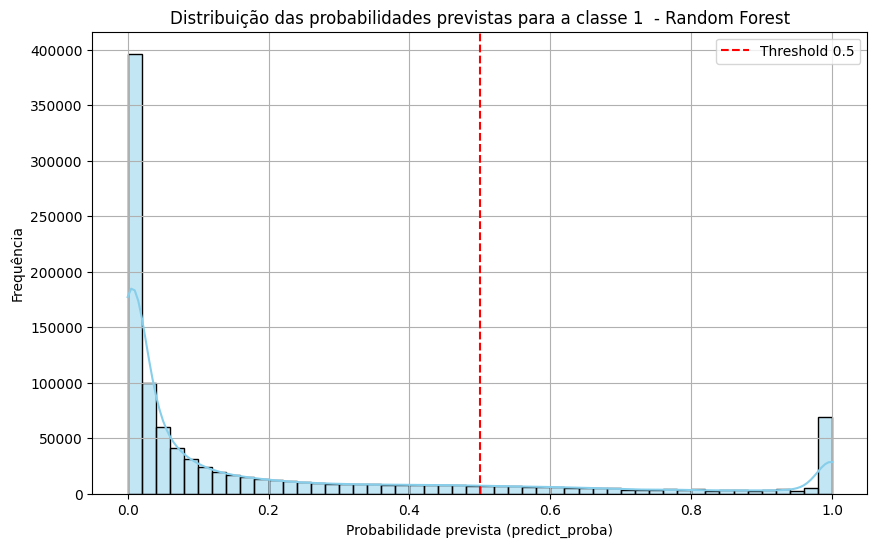

----------------------------------------------------------------------------


In [8]:
resultados = []
modelos_treinados = {}

for nome, modelo in modelos.items():
    inicio_treino = dt.datetime.now()
    print(f"Treinando {nome}:{inicio_treino.strftime("%Y-%m-%d %H:%M:%S")}")
    cat_features = ['distribuidora_codificado', 'operacao_codificado', 'skill_codificado']
    if nome == 'CatBoost':
        modelo.fit(X_res, y_res, cat_features=cat_features)
    else:
        modelo.fit(X_res, y_res)

    # ⬇️ Armazenando modelo treinado
    modelos_treinados[nome] = modelo
        
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]
    save_model(modelo, nome)
    # tempo de treinamento
    fim_treino = dt.datetime.now()
    tempo_treino = fim_treino - inicio_treino
    print(f"Tempo de treinamento do modelo {nome}: {tempo_treino}")
    print(f"Resultados do modelo {nome}:")
    funcoes_avaliacao.avaliar_modelo(nome, y_test, y_pred, y_prob)
    funcoes_avaliacao.plot_matriz_confusao(y_test, y_pred, nome)
    funcoes_avaliacao.plot_distribuicao_probabilidades(nome,y_prob)

    print(f"----------------------------------------------------------------------------")

    resultados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })




🔧 Threshold = 0.30
Precision: 0.4591039714926145
Recall: 0.8042275571485383
F1 Score: 0.584524421499774
AUC: 0.8802864871638618


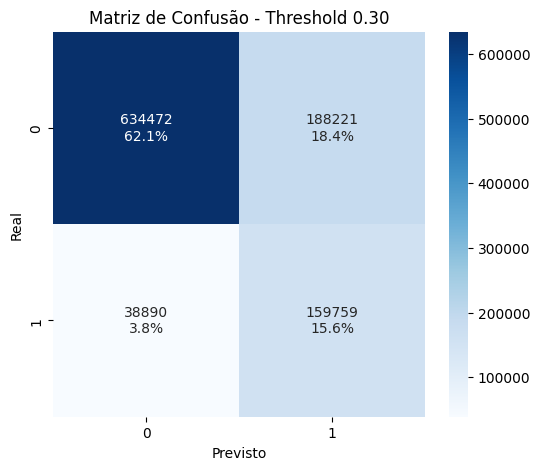

In [13]:
funcoes_avaliacao.avaliar_threshold(y_test, y_prob, threshold=0.3)
#plot_matriz_confusao2(y_test, y_pred, 'catboost')


--- Comparação geral dos modelos ---


,Modelo,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost,0.874907,0.677384,0.681342,0.679357,0.880930
1,LightGBM,0.874151,0.674844,0.681146,0.677981,0.880302
2,CatBoost,0.874541,0.675807,0.682233,0.679005,0.880782
3,Random Forest,0.861273,0.665027,0.577758,0.618328,0.836239


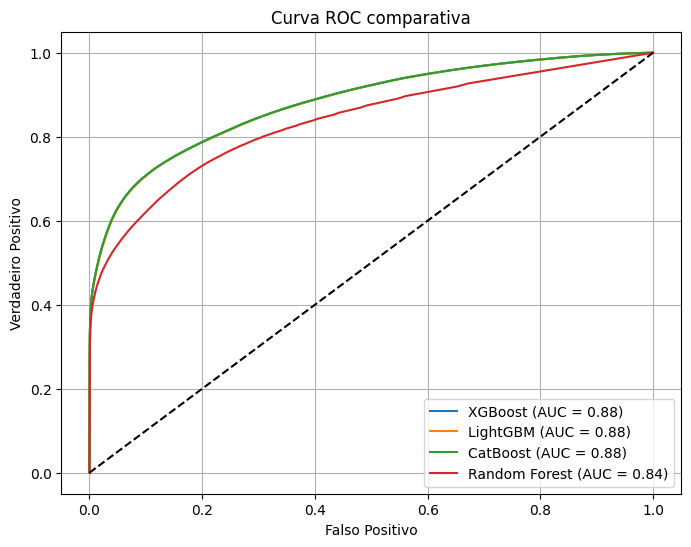

In [9]:
#Comparar resultados em tabela
df_resultados = pd.DataFrame(resultados)
print("\n--- Comparação geral dos modelos ---")
display(df_resultados)

# 06 - Plotar curva ROC comparativa
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for nome, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC comparativa')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [9]:
# Cria um DataFrame para facilitar a análise
df_result = pd.DataFrame({
    'y_prob': y_prob,
    'y_true': y_test
})

# Filtra os exemplos com alta confiança
df_confident = df_result[df_result['y_true'] == 1]

In [10]:
# Alinha os dados de entrada com os índices confiantes
X_confident = X_test.loc[df_confident.index]

# Junta todas as colunas (features + y_true + y_prob)
df_confident_full = pd.concat([X_confident, df_confident], axis=1)
df_confident_full

,distribuidora_codificado,duracao_fila,duracao_atendimento,operacao_codificado,skill_codificado,hora,flag_pesquisa,resposta_1,resposta_2,resposta_3,media_rechamada_agente,media_rechamada_cliente,y_prob,y_true
3903938,9,0,267,1,24,11,0,0,0,0,0.634518,0.000000,0.64,1
2726658,1,41,295,2,24,5,0,0,0,0,0.500000,0.000000,0.30,1
1404,1,0,17,0,12,9,0,0,0,0,0.500000,0.375000,0.90,1
437161,9,0,21,2,24,22,1,1,2,4,0.488064,0.200000,0.93,1
2859799,5,0,141,1,24,17,0,0,0,0,0.487437,0.250000,0.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523761,5,11,8,1,5,8,0,0,0,0,0.795230,0.285714,1.00,1
3839811,5,39,12,2,27,16,0,0,0,0,0.771698,1.000000,1.00,1
3667974,5,2,12,2,5,17,0,0,0,0,0.427403,1.000000,0.93,1
4303278,9,29,12,1,24,19,0,0,0,0,0.876139,0.000000,1.00,1


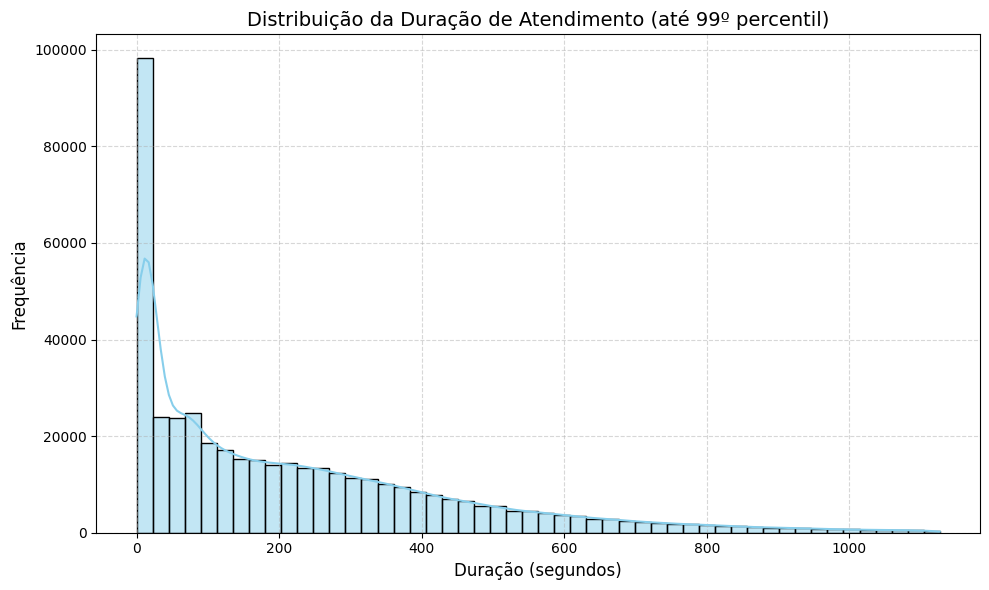

duracao_atendimento
8       0.083991
12      0.063494
11      0.006227
15      0.005856
7       0.004993
          ...   
1687    0.000002
2795    0.000002
1769    0.000002
2042    0.000002
1748    0.000002
Name: proportion, Length: 1978, dtype: float64

In [11]:
# Suponha que df['duracao_atendimento'] contenha os dados
coluna = df_confident_full['duracao_atendimento']

# Limitar os outliers para uma visualização mais clara (ex: abaixo do percentil 99)
limite = np.percentile(coluna, 99)

plt.figure(figsize=(10, 6))
sns.histplot(coluna[coluna <= limite], bins=50, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribuição da Duração de Atendimento (até 99º percentil)", fontsize=14)
plt.xlabel("Duração (segundos)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
df_confident_full['duracao_atendimento'].value_counts(normalize=True)


In [12]:
# Obter importâncias
importancias = modelo.get_feature_importance()
nomes_features = X_train.columns

# Plotar
plt.figure(figsize=(10,6))
plt.barh(nomes_features, importancias)
plt.xlabel("Importância")
plt.title("Importância das Features - CatBoost")
plt.gca().invert_yaxis()
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'get_feature_importance'

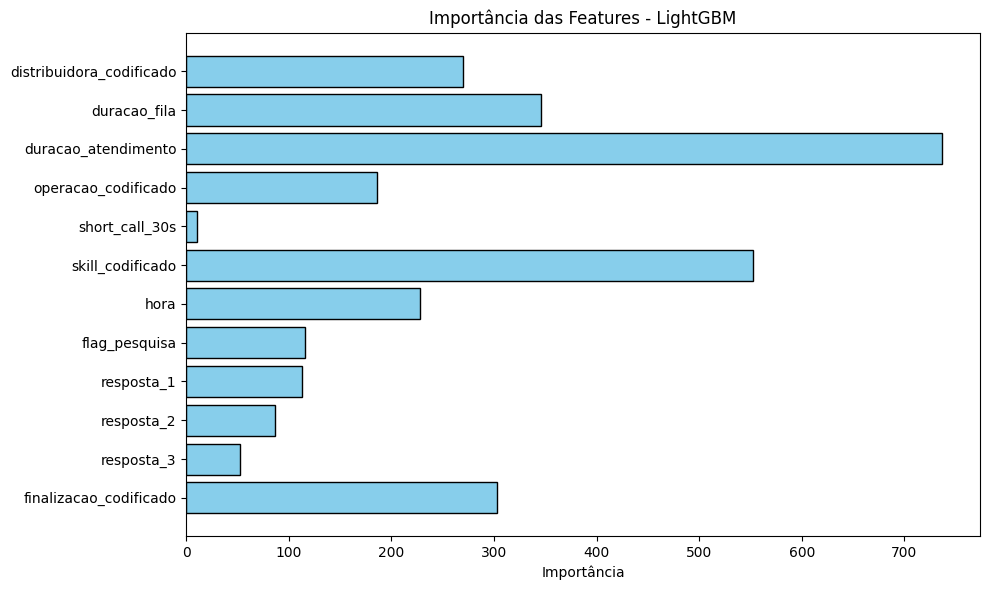

In [10]:
# Obter importâncias
importancias = modelos_treinados['LightGBM'].feature_importances_
nomes_features = X_train.columns

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias, color='skyblue', edgecolor='black')
plt.xlabel("Importância")
plt.title("Importância das Features - LightGBM")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

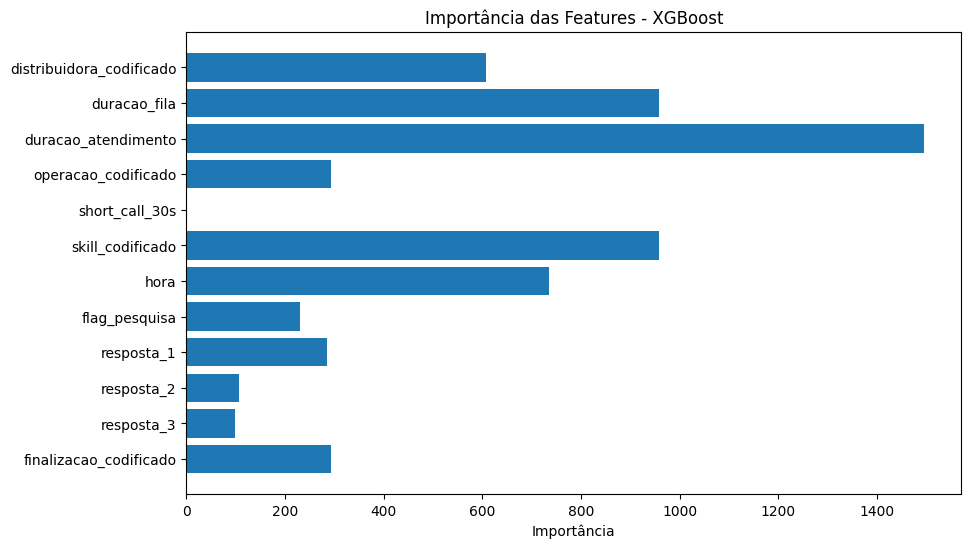

In [11]:
# Obter importâncias
importancias_dict = modelos_treinados['XGBoost'].get_booster().get_score(importance_type='weight')
# Convertendo para lista na mesma ordem de X_train.columns
importancias = [importancias_dict.get(f, 0) for f in X_train.columns]

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importancias)
plt.xlabel("Importância")
plt.title("Importância das Features - XGBoost")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import shap

# Criar objeto explainer
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test)

# Plotar explicação global
shap.summary_plot(shap_values, X_test)

c:\Users\Marcelo Almeida\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 